In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers


In [16]:
import matplotlib.pyplot as plt
from IPython.display import HTML

# Import data into tensorflow dataset object

pip install split-folders

cd training
split_folders --output dataset --ratio .7 .1 .2 -- PlantVillage

In [17]:
IMAGE_SIZE = 256
CHANNELS = 3

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [19]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [20]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [45]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#    

[[[0.7143458  0.67120856 0.7025811 ]
  [0.7158768  0.67273957 0.7041121 ]
  [0.7174079  0.67427063 0.7056432 ]
  ...
  [0.567392   0.5164116  0.5505597 ]
  [0.532591   0.48161063 0.5169047 ]
  [0.5221791  0.4711987  0.50649285]]

 [[0.70623    0.66309273 0.6944653 ]
  [0.7069955  0.66385823 0.6952308 ]
  [0.70776105 0.66462374 0.69599634]
  ...
  [0.57083684 0.51985645 0.55477005]
  [0.52799785 0.4770175  0.5123116 ]
  [0.52179635 0.47081596 0.5061101 ]]

 [[0.7133405  0.67020327 0.7015758 ]
  [0.71257496 0.6694377  0.70081025]
  [0.71180946 0.6686722  0.70004475]
  ...
  [0.5702389  0.5192585  0.5545526 ]
  [0.5253165  0.47433603 0.5096302 ]
  [0.52342945 0.47244906 0.5077432 ]]

 ...

 [[0.5705436  0.5430926  0.6058377 ]
  [0.5833515  0.5559005  0.6186456 ]
  [0.60579187 0.5783409  0.641086  ]
  ...
  [0.53056157 0.4835028  0.5384047 ]
  [0.5304814  0.48342255 0.53771335]
  [0.53316075 0.48610187 0.5388616 ]]

 [[0.5697781  0.54232705 0.6050722 ]
  [0.58526534 0.5578143  0.62055945]


In [22]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [23]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [24]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.5393153  0.5275506  0.59421724]
  [0.6436321  0.6318674  0.6985341 ]
  [0.51157063 0.49980593 0.5664726 ]
  ...
  [0.72458214 0.72066057 0.7755625 ]
  [0.72354364 0.7196221  0.77452403]
  [0.7225052  0.71858364 0.7734856 ]]

 [[0.5195843  0.5078196  0.57448626]
  [0.66595924 0.65419453 0.7208612 ]
  [0.49881643 0.48705173 0.5537184 ]
  ...
  [0.72156864 0.7176471  0.7725491 ]
  [0.72156864 0.7176471  0.7725491 ]
  [0.72156864 0.7176471  0.7725491 ]]

 [[0.5382503  0.5264856  0.5931523 ]
  [0.64756095 0.63579625 0.7024629 ]
  [0.52114356 0.50937885 0.5760455 ]
  ...
  [0.72391444 0.7199929  0.77489483]
  [0.72443366 0.7205121  0.77541405]
  [0.72495294 0.72103137 0.7759333 ]]

 ...

 [[0.5430027  0.531238   0.5979047 ]
  [0.55503225 0.54326755 0.6099342 ]
  [0.5674939  0.5557292  0.6223959 ]
  ...
  [0.6901961  0.6862745  0.7411765 ]
  [0.6901961  0.6862745  0.7411765 ]
  [0.6901961  0.6862745  0.7411765 ]]

 [[0.6358596  0.6240949  0.69076157]
  [0.6460068  0.6342421  0.7009088 ]


# Building the Model

In [25]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

# Compiling the Model

We use `adam `Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [27]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [28]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=25,
)

Epoch 1/25
47/47 [==============================] - 155s 3s/step - loss: 0.8846 - accuracy: 0.4959 - val_loss: 0.7382 - val_accuracy: 0.6198
Epoch 2/25
47/47 [==============================] - 115s 2s/step - loss: 0.6037 - accuracy: 0.7008 - val_loss: 0.6558 - val_accuracy: 0.6198
Epoch 3/25
47/47 [==============================] - 117s 2s/step - loss: 0.5027 - accuracy: 0.7673 - val_loss: 0.3986 - val_accuracy: 0.8281
Epoch 4/25
47/47 [==============================] - 121s 3s/step - loss: 0.3304 - accuracy: 0.8691 - val_loss: 0.2697 - val_accuracy: 0.8542
Epoch 5/25
47/47 [==============================] - 126s 3s/step - loss: 0.3131 - accuracy: 0.8745 - val_loss: 0.5164 - val_accuracy: 0.7448
Epoch 6/25
47/47 [==============================] - 115s 2s/step - loss: 0.2438 - accuracy: 0.9172 - val_loss: 0.2100 - val_accuracy: 0.9271
Epoch 7/25
47/47 [==============================] - 115s 2s/step - loss: 0.1717 - accuracy: 0.9315 - val_loss: 0.2825 - val_accuracy: 0.9062
Epoch 8/25
47

In [29]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 33s 2s/step - loss: 0.3768 - accuracy: 0.8167


In [46]:
scores

[0.37681540846824646, 0.8167053461074829]

# Plotting the Accuracy and Loss Curves

In [47]:
history

In [48]:
history.params

{'verbose': 1, 'epochs': 25, 'steps': 47}

In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

In [50]:
type(history.history['loss'])

list

In [51]:
len(history.history['loss'])

25

In [52]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8845646977424622,
 0.6036829352378845,
 0.5027145147323608,
 0.33038875460624695,
 0.31309837102890015]

In [53]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [54]:
val_acc

[0.6197916865348816,
 0.6197916865348816,
 0.828125,
 0.8541666865348816,
 0.7447916865348816,
 0.9270833134651184,
 0.90625,
 0.9270833134651184,
 0.9739583134651184,
 0.9635416865348816,
 0.8958333134651184,
 0.9791666865348816,
 0.9895833134651184,
 0.9791666865348816,
 0.96875,
 0.953125,
 0.9895833134651184,
 0.8802083134651184,
 0.984375,
 0.9895833134651184,
 0.984375,
 0.9895833134651184,
 0.9895833134651184,
 0.9947916865348816,
 0.8020833134651184]

In [55]:
acc

[0.49592944979667664,
 0.7008141279220581,
 0.7672998905181885,
 0.8690637946128845,
 0.8744911551475525,
 0.9172320365905762,
 0.9314789772033691,
 0.9321573972702026,
 0.9721845388412476,
 0.9497964978218079,
 0.9497964978218079,
 0.9667571187019348,
 0.9810040593147278,
 0.9762550592422485,
 0.9803256392478943,
 0.9694707989692688,
 0.988466739654541,
 0.9735413789749146,
 0.9586160182952881,
 0.9864314794540405,
 0.9803256392478943,
 0.9911804795265198,
 0.9938941597938538,
 0.997286319732666,
 0.9484395980834961]

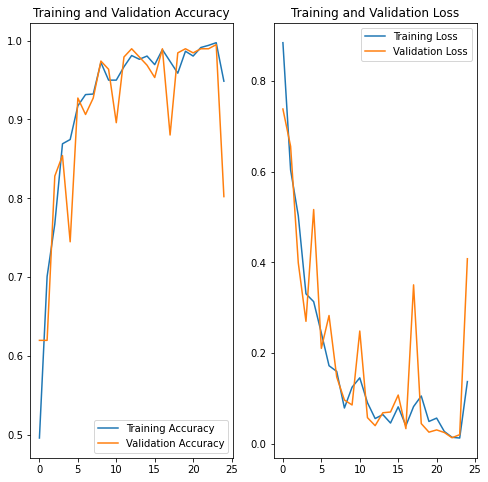

In [56]:
EPOCHS = 25

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
predicted label: Potato___Late_blight


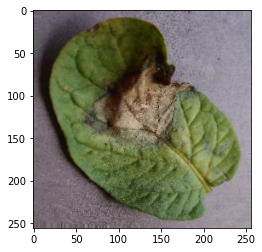

In [59]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [60]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

#### Now run inference on few sample images

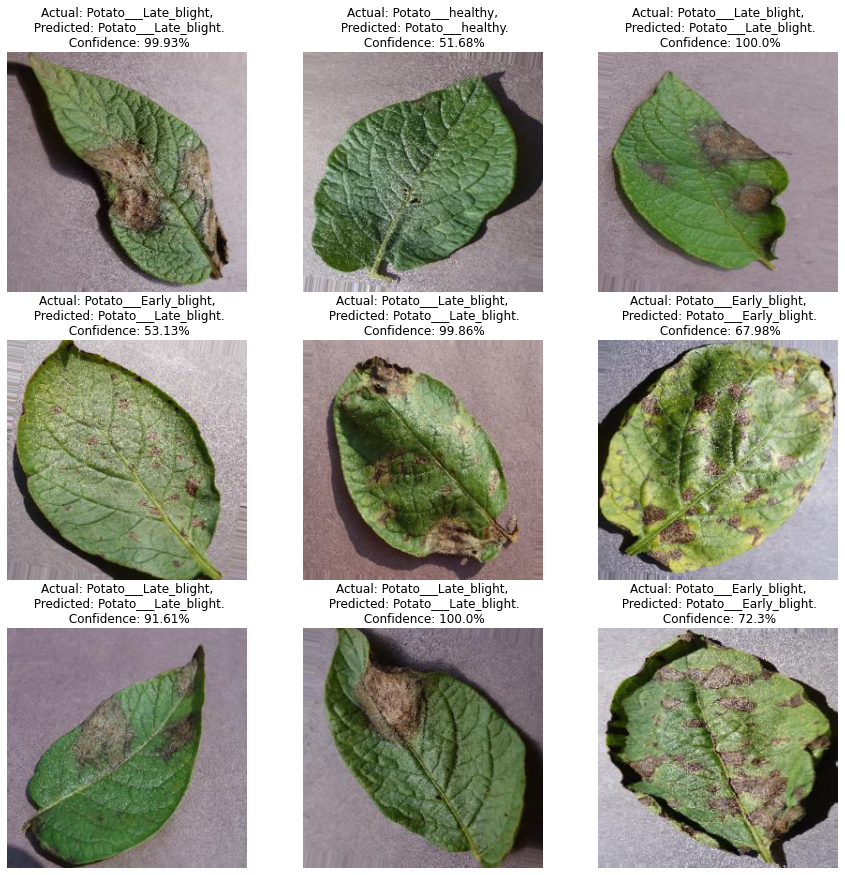

In [61]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

## Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [62]:
model.save("../potato_Detection.h5")